<a href="https://colab.research.google.com/github/youse0ng/pytorch_practice/blob/main/03_pytorch_computer_vision_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 03. PyTorch Computer Vision Exercises

The following is a collection of exercises based on computer vision fundamentals in PyTorch.

They're a bunch of fun.

You're going to get to write plenty of code!

## Resources

1. These exercises are based on [notebook 03 of the Learn PyTorch for Deep Learning course](https://www.learnpytorch.io/03_pytorch_computer_vision/).
2. See a live [walkthrough of the solutions (errors and all) on YouTube](https://youtu.be/_PibmqpEyhA).
  * **Note:** Going through these exercises took me just over 3 hours of solid coding, so you should expect around the same.
3. See [other solutions on the course GitHub](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions).

In [ ]:
# Check for GPU
!nvidia-smi

/bin/bash: nvidia-smi: command not found


In [ ]:
# Import torch
import torch

# Exercises require PyTorch > 1.10.0
print(torch.__version__)

# TODO: Setup device agnostic code


2.0.1+cu118


## 1. What are 3 areas in industry where computer vision is currently being used?

## 2. Search "what is overfitting in machine learning" and write down a sentence about what you find.

## 3. Search "ways to prevent overfitting in machine learning", write down 3 of the things you find and a sentence about each.
> **Note:** there are lots of these, so don't worry too much about all of them, just pick 3 and start with those.

## 4. Spend 20-minutes reading and clicking through the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/).

* Upload your own example image using the "upload" button on the website and see what happens in each layer of a CNN as your image passes through it.

## 5. Load the [`torchvision.datasets.MNIST()`](https://pytorch.org/vision/stable/generated/torchvision.datasets.MNIST.html#torchvision.datasets.MNIST) train and test datasets.

In [ ]:
from torchvision import datasets
import torch
from torchvision.transforms import ToTensor

train_data=datasets.MNIST(root="data",
                          train=True,
                          download=True,
                          transform=ToTensor(),
                          target_transform=None)

test_data=datasets.MNIST(root="data",
                         train=False,
                         download=True,
                         transform=ToTensor(),
                         target_transform=None)
train_data,test_data
train_data[0]
image,label=train_data[0]

100%|██████████| 9912422/9912422 [00:00<00:00, 81471480.56it/s]


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 78915761.45it/s]


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 22678994.70it/s]


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 12467623.54it/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



In [ ]:
print(f"image = {image} \n")
print(f"label = {label}")

image = tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

In [ ]:
len(train_data),len(test_data)

(60000, 10000)

In [ ]:
train_data,test_data

(Dataset MNIST
     Number of datapoints: 60000
     Root location: data
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset MNIST
     Number of datapoints: 10000
     Root location: data
     Split: Test
     StandardTransform
 Transform: ToTensor())

## 6. Visualize at least 5 different samples of the MNIST training dataset.

In [ ]:
class_names=test_data.classes

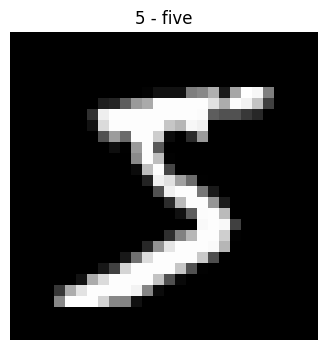

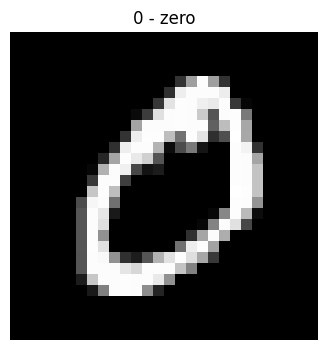

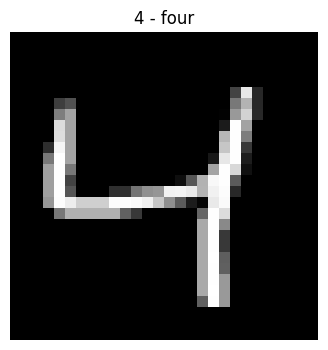

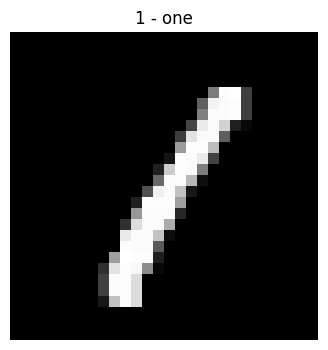

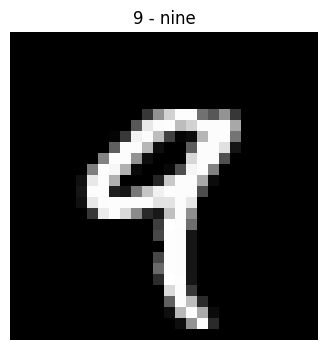

In [ ]:
import matplotlib.pyplot as plt

for i in range(5):
  image,label=train_data[i]
  image_squeeze=image.squeeze()
  plt.figure(figsize=(4,4))
  plt.imshow(image_squeeze,cmap='gray')
  plt.title(class_names[label])
  plt.axis(False)

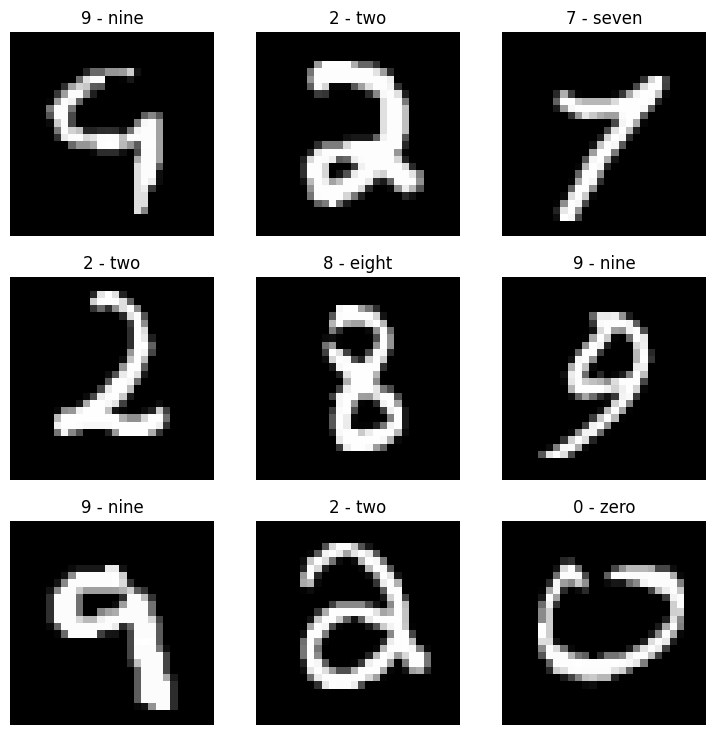

In [ ]:
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(9,9))
rows,cols=3,3
for i in range(1,rows*cols+1):
  random_idx=torch.randint(0,len(train_data),size=(1,)).item()
  image,label=train_data[random_idx]
  fig.add_subplot(rows,cols,i)
  plt.imshow(image.squeeze(),cmap="gray")
  plt.title(class_names[label])
  plt.axis(False)

## 7. Turn the MNIST train and test datasets into dataloaders using `torch.utils.data.DataLoader`, set the `batch_size=32`.

In [ ]:
BATCH_SIZE=32
from torch.utils.data import DataLoader
train_dataloader=DataLoader(dataset=train_data,
                            batch_size=BATCH_SIZE,
                            shuffle=True,
                            )
test_dataloader=DataLoader(dataset=test_data,
                           batch_size=BATCH_SIZE,
                           shuffle=False)

print(len(train_dataloader))
print(len(test_dataloader))
train_dataloader,test_dataloader

1875
313


(<torch.utils.data.dataloader.DataLoader at 0x7fa801fd37c0>,
 <torch.utils.data.dataloader.DataLoader at 0x7fa801fd3c10>)

In [ ]:
for sample in next(iter(train_dataloader)):
  print(sample.shape)

torch.Size([32, 1, 28, 28])
torch.Size([32])


In [ ]:
next(iter(train_dataloader))

[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ...,
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.]]],
 
 
         [[[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ...,
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.]]],
 
 
         [[[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ...,
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.]]],
 
 
         ...,
 
 
         [[[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ..

In [ ]:
next(iter(train_dataloader))

[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ...,
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.]]],
 
 
         [[[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ...,
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.]]],
 
 
         [[[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ...,
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.]]],
 
 
         ...,
 
 
         [[[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ..

In [ ]:
sample.shape

torch.Size([32])

## 8. Recreate `model_2` used in notebook 03 (the same model from the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/), also known as TinyVGG) capable of fitting on the MNIST dataset.

In [ ]:
from torch import nn
class TinyVGG(nn.Module):
  def __init__(self,input_shape:int,output_shape:int,hidden_units:int):
    super().__init__()
    self.conv_block_1=nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    self.conv_block_2=nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  padding=1,
                  stride=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    self.classifier=nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*7*7,
                  out_features=output_shape)
    )
  def forward(self,x):
    x=self.conv_block_1(x)
    print(f"shape of x : {x.shape}")
    x=self.conv_block_2(x)
    print(f"shape of x : {x.shape}")
    x=self.classifier(x)
    print(f"shape of x : {x.shape}")
    return x


model_cpu=TinyVGG(input_shape=1,
                  output_shape=len(class_names),
                  hidden_units=10).to("cpu")

In [ ]:
model_cpu

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

## 9. Train the model you built in exercise 8. for 5 epochs on CPU and GPU and see how long it takes on each.

In [ ]:
device="cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [ ]:
from tqdm.auto import tqdm

loss_fn=nn.CrossEntropyLoss()
optimizer=torch.optim.SGD(model_cpu.parameters(),lr=0.1)

In [ ]:
epochs=5
for epoch in tqdm(range(epochs)):
  train_loss=0
  for batch,(X,y) in enumerate(train_dataloader):
    model_cpu.train()
    X,y=X.to("cpu"),y.to("cpu")

    # Forward pass
    y_logits=model_cpu(X)

    # Loss calculation
    loss=loss_fn(y_logits,y)
    train_loss+=loss

    # Optimizer zero grad
    optimizer.zero_grad()

    # Loss backward
    loss.backward()

    # Optimizer step()
    optimizer.step()

    # Adjust for train loss for number of batches
  train_loss/=len(train_dataloader)

  ### Testing loop
  model_cpu.eval()
  test_loss_total=0
  with torch.inference_mode():
    for batch,(X_test,y_test) in enumerate(test_dataloader):
      # forward pass
      X_test,y_test=X_test.to("cpu"),y_test.to("cpu")
      test_logits=model_cpu(X_test)
      test_loss =loss_fn(test_logits,y_test)
      test_loss_total += test_loss
    test_loss_total /= len(test_dataloader)
  print(f"Epoch: {epoch} | Loss : {train_loss:.2f} | Test_loss : {test_loss_total:.2f}")

  0%|          | 0/5 [00:00<?, ?it/s]

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
shape of x : torch.Size([32, 10])
shape of x : torch.Size([32, 10, 14, 14])
shape of x : torch.Size([32, 10, 7, 7])
shape of x : torch.Size([32, 10])
shape of x : torch.Size([32, 10, 14, 14])
shape of x : torch.Size([32, 10, 7, 7])
shape of x : torch.Size([32, 10])
shape of x : torch.Size([32, 10, 14, 14])
shape of x : torch.Size([32, 10, 7, 7])
shape of x : torch.Size([32, 10])
shape of x : torch.Size([32, 10, 14, 14])
shape of x : torch.Size([32, 10, 7, 7])
shape of x : torch.Size([32, 10])
shape of x : torch.Size([32, 10, 14, 14])
shape of x : torch.Size([32, 10, 7, 7])
shape of x : torch.Size([32, 10])
shape of x : torch.Size([32, 10, 14, 14])
shape of x : torch.Size([32, 10, 7, 7])
shape of x : torch.Size([32, 10])
shape of x : torch.Size([32, 10, 14, 14])
shape of x : torch.Size([32, 10, 7, 7])
shape of x : torch.Size([32, 10])
shape of x : torch.Size([32, 10, 14, 14])
shape of x : torch.Size([32, 10, 7, 7])
shape of x : torch.Size([32, 10])
sh

## 10. Make predictions using your trained model and visualize at least 5 of them comparing the prediciton to the target label.

In [ ]:
test_data[0][0].shape

torch.Size([1, 28, 28])

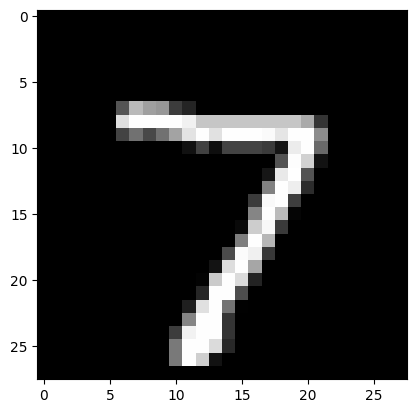

In [ ]:
plt.imshow(test_data[0][0].squeeze(),cmap="gray")

In [ ]:
test_data[0][0].unsqueeze(dim=0).shape

torch.Size([1, 1, 28, 28])

In [ ]:
# Logits -> Make probabilites -> label

model_pred_logits=model_cpu(test_data[0][0].unsqueeze(dim=0))
print(f"Model_pred_logits: {model_pred_logits}")
print(f"Model_pred_logits_shape: {model_pred_logits.shape}")
model_pred_probs=torch.softmax(model_pred_logits,dim=1)
print(f"Model_pred_probs: {model_pred_probs}")
print(f"Model_pred_probs_shape: {model_pred_probs.shape}")
model_pred_label=torch.argmax(model_pred_probs,dim=1)
print(f"Model_pred_label: {model_pred_label}")
print(f"Model_pred_label_shape: {model_pred_label.shape}")

shape of x : torch.Size([1, 10, 14, 14])
shape of x : torch.Size([1, 10, 7, 7])
shape of x : torch.Size([1, 10])
Model_pred_logits: tensor([[ -1.7074,  -3.0591,   1.6572,   6.0022,  -9.2484,  -1.6480, -14.6047,
          20.4808,  -1.4771,   2.6570]], grad_fn=<AddmmBackward0>)
Model_pred_logits_shape: torch.Size([1, 10])
Model_pred_probs: tensor([[2.3108e-10, 5.9807e-11, 6.6838e-09, 5.1523e-07, 1.2268e-13, 2.4523e-10,
         5.7882e-16, 1.0000e+00, 2.9094e-10, 1.8165e-08]],
       grad_fn=<SoftmaxBackward0>)
Model_pred_probs_shape: torch.Size([1, 10])
Model_pred_label: tensor([7])
Model_pred_label_shape: torch.Size([1])


In [ ]:
len(test_data)

10000

shape of x : torch.Size([1, 10, 14, 14])
shape of x : torch.Size([1, 10, 7, 7])
shape of x : torch.Size([1, 10])
shape of x : torch.Size([1, 10, 14, 14])
shape of x : torch.Size([1, 10, 7, 7])
shape of x : torch.Size([1, 10])
shape of x : torch.Size([1, 10, 14, 14])
shape of x : torch.Size([1, 10, 7, 7])
shape of x : torch.Size([1, 10])
shape of x : torch.Size([1, 10, 14, 14])
shape of x : torch.Size([1, 10, 7, 7])
shape of x : torch.Size([1, 10])
shape of x : torch.Size([1, 10, 14, 14])
shape of x : torch.Size([1, 10, 7, 7])
shape of x : torch.Size([1, 10])
shape of x : torch.Size([1, 10, 14, 14])
shape of x : torch.Size([1, 10, 7, 7])
shape of x : torch.Size([1, 10])
shape of x : torch.Size([1, 10, 14, 14])
shape of x : torch.Size([1, 10, 7, 7])
shape of x : torch.Size([1, 10])
shape of x : torch.Size([1, 10, 14, 14])
shape of x : torch.Size([1, 10, 7, 7])
shape of x : torch.Size([1, 10])
shape of x : torch.Size([1, 10, 14, 14])
shape of x : torch.Size([1, 10, 7, 7])
shape of x : tor

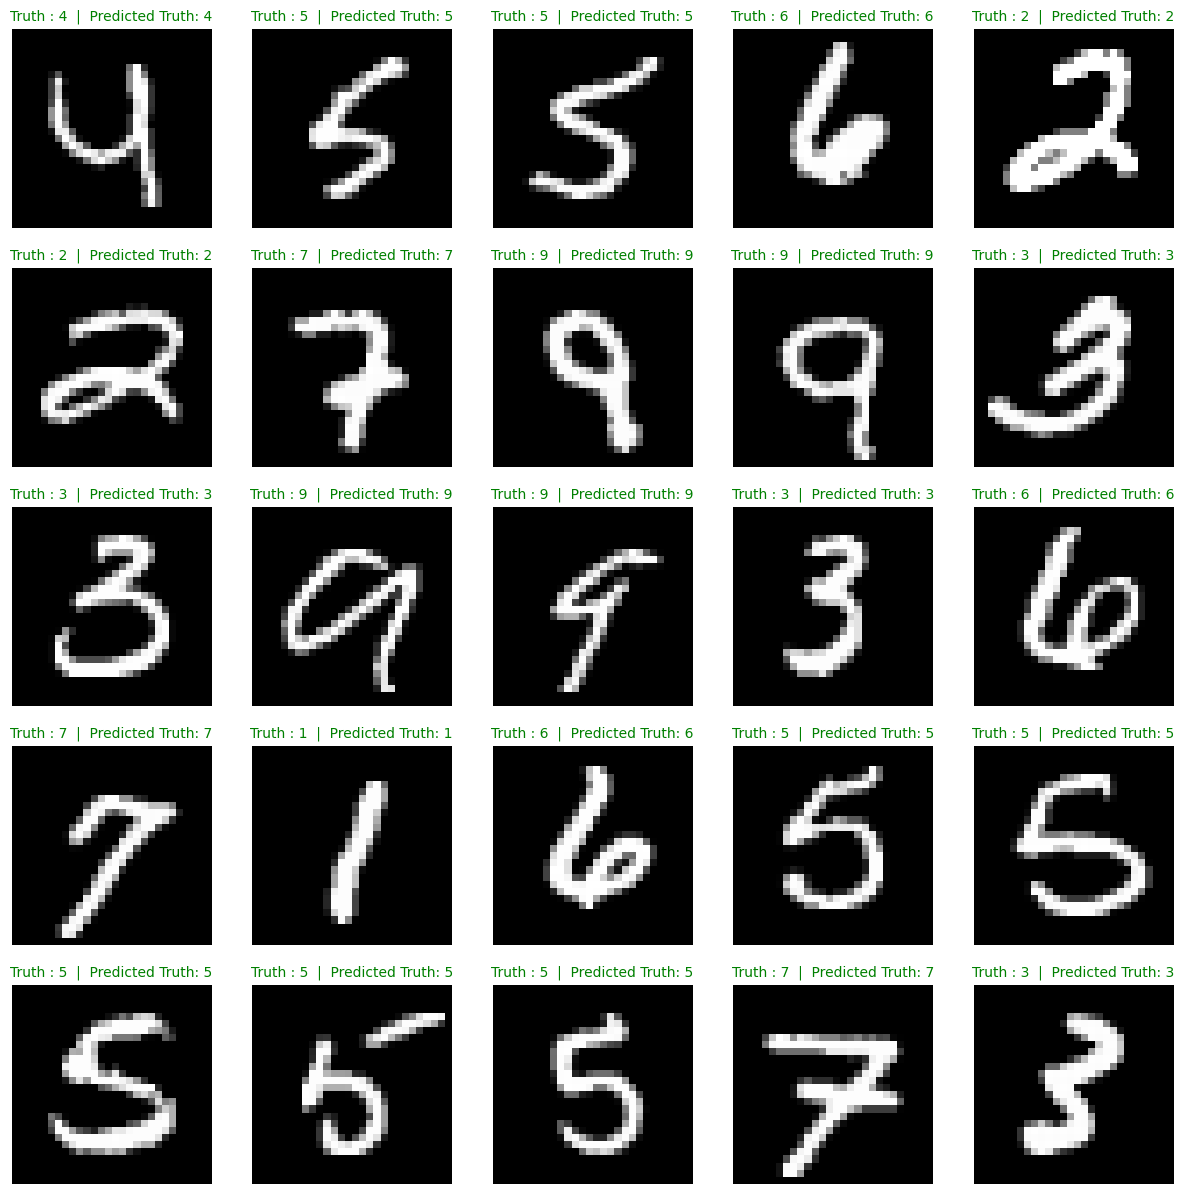

In [ ]:
import matplotlib.pyplot as plt
num_to_plot = 25
rows, cols =5,5

fig=plt.figure(figsize=(15,15))
for i in range(1,rows*cols+1):
  # Get image and labels from the test data
  random_idx=torch.randint(low=0,high=len(test_data),size=(1,)).item()
  img,label=test_data[random_idx]
  # Make prediction on image
  model_pred_logits=model_cpu(img.unsqueeze(dim=0))
  model_pred_probs=torch.softmax(model_pred_logits,dim=1)
  model_pred_label=torch.argmax(model_pred_probs,dim=1)
  # Plot the image and prediction
  fig.add_subplot(rows,cols,i)
  plt.imshow(img.squeeze(), cmap="gray")
  if label==model_pred_label:
    plt.title(f"Truth : {label}  |  Predicted Truth: {model_pred_label.item()}",fontsize=10, c="g") # green text if prediction same as truth
  else:
    plt.title(f"Truth : {label}  |  Predicted Truth: {model_pred_label.item()}",fontsize=10, c="r") # 정답이 아니면 빨간
  plt.axis(False);

## 11. Plot a confusion matrix comparing your model's predictions to the truth labels.

In [ ]:
pip install torchmetrics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 728.8/728.8 kB 11.8 MB/s eta 0:00:00


In [ ]:
!pip install -q torchmetrics -U mlxtend

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 15.2 MB/s eta 0:00:00


In [ ]:
import mlxtend
mlxtend.__version__

'0.22.0'

In [ ]:
torch.manual_seed(42)
x=torch.randn(size=(3,3))
y=torch.randn(size=(3,3))
x,y
print(x)
print(y)
z=torch.cat((x,y),dim=0)
print(z)

tensor([[ 0.3367,  0.1288,  0.2345],
        [ 0.2303, -1.1229, -0.1863],
        [ 2.2082, -0.6380,  0.4617]])
tensor([[ 0.2674,  0.5349,  0.8094],
        [ 1.1103, -1.6898, -0.9890],
        [ 0.9580,  1.3221,  0.8172]])
tensor([[ 0.3367,  0.1288,  0.2345],
        [ 0.2303, -1.1229, -0.1863],
        [ 2.2082, -0.6380,  0.4617],
        [ 0.2674,  0.5349,  0.8094],
        [ 1.1103, -1.6898, -0.9890],
        [ 0.9580,  1.3221,  0.8172]])


In [ ]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix
test_pred_label=[]
with torch.inference_mode():
    for batch,(X_test,y_test) in enumerate(test_dataloader):
      # forward pass
      X_test,y_test=X_test.to("cpu"),y_test.to("cpu")
      test_logits=model_cpu(X_test)
      test_probs=torch.softmax(test_logits,dim=1)
      test_label=torch.argmax(test_probs,dim=1)
      test_pred_label.append(test_label)
    test_pred_label=torch.cat(test_pred_label).cpu()
print(test_pred_label)
print(type(test_pred_label))
print(len(test_pred_label))

shape of x : torch.Size([32, 10, 14, 14])
shape of x : torch.Size([32, 10, 7, 7])
shape of x : torch.Size([32, 10])
shape of x : torch.Size([32, 10, 14, 14])
shape of x : torch.Size([32, 10, 7, 7])
shape of x : torch.Size([32, 10])
shape of x : torch.Size([32, 10, 14, 14])
shape of x : torch.Size([32, 10, 7, 7])
shape of x : torch.Size([32, 10])
shape of x : torch.Size([32, 10, 14, 14])
shape of x : torch.Size([32, 10, 7, 7])
shape of x : torch.Size([32, 10])
shape of x : torch.Size([32, 10, 14, 14])
shape of x : torch.Size([32, 10, 7, 7])
shape of x : torch.Size([32, 10])
shape of x : torch.Size([32, 10, 14, 14])
shape of x : torch.Size([32, 10, 7, 7])
shape of x : torch.Size([32, 10])
shape of x : torch.Size([32, 10, 14, 14])
shape of x : torch.Size([32, 10, 7, 7])
shape of x : torch.Size([32, 10])
shape of x : torch.Size([32, 10, 14, 14])
shape of x : torch.Size([32, 10, 7, 7])
shape of x : torch.Size([32, 10])
shape of x : torch.Size([32, 10, 14, 14])
shape of x : torch.Size([32, 1

(<Figure size 1000x700 with 1 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

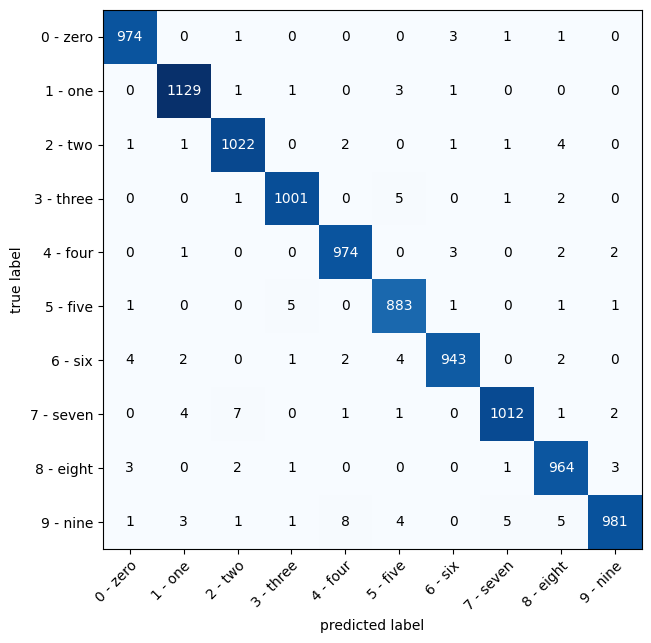

In [ ]:
confmat = ConfusionMatrix(task="multiclass", num_classes=len(class_names))
confmat_tensor = confmat(preds=test_pred_label,
                         target=test_data.targets)
confmat_tensor
plot_confusion_matrix(conf_mat=confmat_tensor.numpy(),
                      figsize=(10,7),
                      class_names=test_data.classes
                      )

## 12. Create a random tensor of shape `[1, 3, 64, 64]` and pass it through a `nn.Conv2d()` layer with various hyperparameter settings (these can be any settings you choose), what do you notice if the `kernel_size` parameter goes up and down?

In [ ]:
random_tensor=torch.rand(size=(1,3,64,64))
random_tensor.shape

torch.Size([1, 3, 64, 64])

In [ ]:
conv_layer=nn.Conv2d(in_channels=3,
                     out_channels=8,
                     kernel_size=3,
                     padding=1,
                     stride=1)

print(f"Random Tensor original shape= {random_tensor.shape}")
random_tensor_through_conv_layer=conv_layer(random_tensor)
print(f"Random Tensor through conv layer = {random_tensor_through_conv_layer.shape}")

Random Tensor original shape= torch.Size([1, 3, 64, 64])
Random Tensor through conv layer = torch.Size([1, 8, 64, 64])


## 13. Use a model similar to the trained `model_2` from notebook 03 to make predictions on the test [`torchvision.datasets.FashionMNIST`](https://pytorch.org/vision/main/generated/torchvision.datasets.FashionMNIST.html) dataset.
* Then plot some predictions where the model was wrong alongside what the label of the image should've been.
* After visualing these predictions do you think it's more of a modelling error or a data error?
* As in, could the model do better or are the labels of the data too close to each other (e.g. a "Shirt" label is too close to "T-shirt/top")?

In [ ]:
from torchvision import datasets
import torch
from torchvision.transforms import ToTensor

train_data=datasets.FashionMNIST(root="data",
                                 train=True,
                                 transform=ToTensor(),
                                 target_transform=None,
                                 download=True)
test_data=datasets.FashionMNIST(root="data",
                                 train=False,
                                 transform=ToTensor(),
                                 target_transform=None,
                                 download=True)

100%|██████████| 26421880/26421880 [00:14<00:00, 1803347.26it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 59066.90it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:02<00:00, 2166849.24it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 16395047.07it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [ ]:
test_data,train_data

(Dataset FashionMNIST
     Number of datapoints: 10000
     Root location: data
     Split: Test
     StandardTransform
 Transform: ToTensor(),
 Dataset FashionMNIST
     Number of datapoints: 60000
     Root location: data
     Split: Train
     StandardTransform
 Transform: ToTensor())

In [ ]:
len(test_data), len(train_data)

(10000, 60000)

In [ ]:
test_data[0] # 튜플 형식

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [ ]:
class_names=test_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [ ]:
fashion_model_2=TinyVGG(input_shape=1,
                output_shape=len(class_names),
                hidden_units=10)
fashion_model_2.state_dict()

OrderedDict([('conv_block_1.0.weight',
              tensor([[[[-0.2677, -0.0527, -0.0330],
                        [-0.1895, -0.1140, -0.1073],
                        [ 0.3215, -0.0238,  0.2702]]],
              
              
                      [[[ 0.0321,  0.1188,  0.1921],
                        [-0.3068, -0.1502, -0.2533],
                        [ 0.3238,  0.1223, -0.1397]]],
              
              
                      [[[-0.2514,  0.1846,  0.0774],
                        [-0.1640, -0.2419, -0.1740],
                        [ 0.0812, -0.2806, -0.0352]]],
              
              
                      [[[ 0.1978,  0.1780,  0.0360],
                        [ 0.0354,  0.0779,  0.1302],
                        [ 0.2631,  0.0905,  0.1832]]],
              
              
                      [[[ 0.2324, -0.2586, -0.1779],
                        [ 0.1830,  0.0668, -0.1924],
                        [ 0.0985, -0.3030, -0.1240]]],
              
              
      

In [ ]:
from torch.utils.data import DataLoader
BATCH_SIZE
fashionMNIST_train_dataloader=DataLoader(dataset=train_data,
                                         batch_size=BATCH_SIZE,
                                         shuffle=True
                                         )
fashionMNIST_test_dataloader=DataLoader(dataset=test_data,
                                        batch_size=BATCH_SIZE,
                                        shuffle=False)

In [ ]:
fashionMNIST_train_dataloader

In [ ]:
next(iter(fashionMNIST_train_dataloader))

[tensor([[[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           ...,
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]]],
 
 
         [[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           ...,
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]]],
 
 
         [[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
           [0.0000

In [ ]:
from tqdm.auto import tqdm

In [ ]:
fashion_model_2.parameters()

<generator object Module.parameters at 0x7fa7d9cf9e70>

In [ ]:
loss_fn=nn.CrossEntropyLoss()
optimizer=torch.optim.SGD(params=fashion_model_2.parameters(),
                          lr=0.01)

In [ ]:
epoch = 5
train_loss=0
test_loss_total=0

for epochs in tqdm(range(epoch)):
  fashion_model_2.train()
  for batch,(X,y) in enumerate(fashionMNIST_train_dataloader):
    # do forward pass
    y_logits=fashion_model_2(X)

    # Calculate loss
    loss=loss_fn(y_logits,y)
    train_loss+=loss

    # Optimizer zero_grad
    optimizer.zero_grad()

    # Loss backward
    loss.backward()

    # Optimizer step()
    optimizer.step()
  train_loss/=len(fashionMNIST_train_dataloader)
  ### Testing
  fashion_model_2.eval()
  with torch.inference_mode():
    for batch,(X_test,y_test) in enumerate(fashionMNIST_train_dataloader):
      y_test_logits=fashion_model_2(X_test)
      test_loss=loss_fn(y_test_logits,y_test)
      test_loss_total+=test_loss
    test_loss_total/=len(fashionMNIST_test_dataloader)
  print(f"Train_loss : {train_loss} | Test_loss : {test_loss_total}")

  0%|          | 0/5 [00:00<?, ?it/s]

Streaming output truncated to the last 5000 lines.
shape of x : torch.Size([32, 10])
shape of x : torch.Size([32, 10, 14, 14])
shape of x : torch.Size([32, 10, 7, 7])
shape of x : torch.Size([32, 10])
shape of x : torch.Size([32, 10, 14, 14])
shape of x : torch.Size([32, 10, 7, 7])
shape of x : torch.Size([32, 10])
shape of x : torch.Size([32, 10, 14, 14])
shape of x : torch.Size([32, 10, 7, 7])
shape of x : torch.Size([32, 10])
shape of x : torch.Size([32, 10, 14, 14])
shape of x : torch.Size([32, 10, 7, 7])
shape of x : torch.Size([32, 10])
shape of x : torch.Size([32, 10, 14, 14])
shape of x : torch.Size([32, 10, 7, 7])
shape of x : torch.Size([32, 10])
shape of x : torch.Size([32, 10, 14, 14])
shape of x : torch.Size([32, 10, 7, 7])
shape of x : torch.Size([32, 10])
shape of x : torch.Size([32, 10, 14, 14])
shape of x : torch.Size([32, 10, 7, 7])
shape of x : torch.Size([32, 10])
shape of x : torch.Size([32, 10, 14, 14])
shape of x : torch.Size([32, 10, 7, 7])
shape of x : torch.Si

In [ ]:
# Make predictions with trained_model
test_preds_label=[]
fashion_model_2.eval()
with torch.inference_mode():
  for batch,(X_test,y_test) in enumerate(fashionMNIST_test_dataloader):
    # Do forward pass
    y_test_logits=fashion_model_2(X_test)
    y_test_probs=torch.softmax(y_test_logits,dim=1)
    y_test_labels=torch.argmax(y_test_probs,dim=1)
    test_preds_label.append(y_test_labels)
test_preds_label=torch.cat(test_preds_label,dim=0)
test_preds_label[:10],len(test_preds_label)

shape of x : torch.Size([32, 10, 14, 14])
shape of x : torch.Size([32, 10, 7, 7])
shape of x : torch.Size([32, 10])
shape of x : torch.Size([32, 10, 14, 14])
shape of x : torch.Size([32, 10, 7, 7])
shape of x : torch.Size([32, 10])
shape of x : torch.Size([32, 10, 14, 14])
shape of x : torch.Size([32, 10, 7, 7])
shape of x : torch.Size([32, 10])
shape of x : torch.Size([32, 10, 14, 14])
shape of x : torch.Size([32, 10, 7, 7])
shape of x : torch.Size([32, 10])
shape of x : torch.Size([32, 10, 14, 14])
shape of x : torch.Size([32, 10, 7, 7])
shape of x : torch.Size([32, 10])
shape of x : torch.Size([32, 10, 14, 14])
shape of x : torch.Size([32, 10, 7, 7])
shape of x : torch.Size([32, 10])
shape of x : torch.Size([32, 10, 14, 14])
shape of x : torch.Size([32, 10, 7, 7])
shape of x : torch.Size([32, 10])
shape of x : torch.Size([32, 10, 14, 14])
shape of x : torch.Size([32, 10, 7, 7])
shape of x : torch.Size([32, 10])
shape of x : torch.Size([32, 10, 14, 14])
shape of x : torch.Size([32, 1

(tensor([9, 2, 1, 1, 6, 1, 4, 6, 5, 7]), 10000)

In [ ]:
import random
random.seed(42)
test_samples=[]
test_label=[]
for samples, label in random.sample(list(test_data),k=9):
  test_samples.append(samples)
  test_label.append(label)

In [ ]:
len(test_samples),len(test_label)
test_samples[0]

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

In [ ]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

Text(0.5, 1.0, 'Label : Sandal')

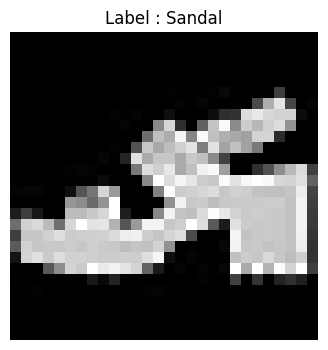

In [ ]:
fig=plt.figure(figsize=[4,4])
# 테스트 샘플과 라벨
plt.imshow(test_samples[0].squeeze(),cmap="gray")
plt.axis(False)
plt.title(f"Label : {class_names[test_label[0]]}")

In [ ]:
y_logits=fashion_model_2(test_samples[0].unsqueeze(dim=0))
y_probs=torch.softmax(y_logits,dim=1)
y_label=torch.argmax(y_probs,dim=1).item()
y_label

shape of x : torch.Size([1, 10, 14, 14])
shape of x : torch.Size([1, 10, 7, 7])
shape of x : torch.Size([1, 10])


5

In [ ]:
# LET's prediction
# 실제 테스트데이터와 학습해서 나온 데이터 라벨링 결과가 얼마나 똑같은지 확인

# 실제 테스트데이터와 라벨링 확인

import random
random.seed(40)
COUNTS=9
test_samples_data=[]
test_samples_label=[]
for test_samples, test_label in random.sample(list(test_data),k=4):
  test_samples_data.append(test_samples)
  test_samples_label.append(test_label)
print(test_samples_label)

[8, 0, 9, 8]


In [ ]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

shape of x : torch.Size([1, 10, 14, 14])
shape of x : torch.Size([1, 10, 7, 7])
shape of x : torch.Size([1, 10])
shape of x : torch.Size([1, 10, 14, 14])
shape of x : torch.Size([1, 10, 7, 7])
shape of x : torch.Size([1, 10])
shape of x : torch.Size([1, 10, 14, 14])
shape of x : torch.Size([1, 10, 7, 7])
shape of x : torch.Size([1, 10])
shape of x : torch.Size([1, 10, 14, 14])
shape of x : torch.Size([1, 10, 7, 7])
shape of x : torch.Size([1, 10])


[8, 0, 9, 8]

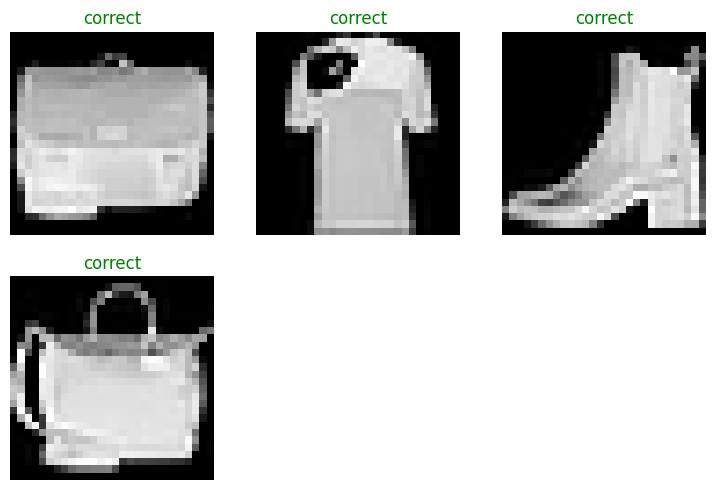

In [ ]:
test_pred_labels=[]
fig=plt.figure(figsize=(9,9))
nrows=3
ncols=3
# 모델을 통해 학습한 뒤 이미지 라벨링 인덱싱
for i,test_data in enumerate(test_samples_data):
  test_data=test_data.unsqueeze(dim=0)
  y_logits=fashion_model_2(test_data)
  y_probs=torch.softmax(y_logits,dim=1)
  y_labels=torch.argmax(y_probs,dim=1).item()
  test_pred_labels.append(y_labels)
  plt.subplot(nrows,ncols, i+1)
  plt.imshow(test_data.squeeze().squeeze(),cmap="gray")
  if test_samples_label[i] == test_pred_labels[i]:
    plt.title("correct",c="g")
  else:
    plt.title("incorrect",c="r")
  plt.axis(False)
test_pred_labels